In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json, re

In [2]:
sns.set_style("whitegrid")
#plt.style.use("seaborn")
params = {#"ytick.color" : "black",
          #"xtick.color" : "black",
          #"axes.labelcolor" : "black",
          #"axes.edgecolor" : "black",
          "text.usetex" : True,
          "font.family" : "serif",
          "font.serif" : ["Computer Modern Serif"]}
plt.rcParams.update(params)

## Dataset analysis

In [3]:
def len_in_words(text: str) -> int:
    return len(re.findall(r'\b\w+\b', text))

In [4]:
with open("../data/swisscom_dataset.json", "r") as f:
    swisscom_dataset = json.load(f)

In [5]:
swisscom_dataset_df = pd.DataFrame({
    "text" : [d["text"] for d in swisscom_dataset],
    "Type" : [d["metadata"]["type"] for d in swisscom_dataset]
})
swisscom_dataset_df["word_count"] = swisscom_dataset_df["text"].apply(lambda t:len_in_words(t))

In [6]:
swisscom_dataset_df.groupby(["Type"]).size()

Type
community     747
webpage      2723
dtype: int64

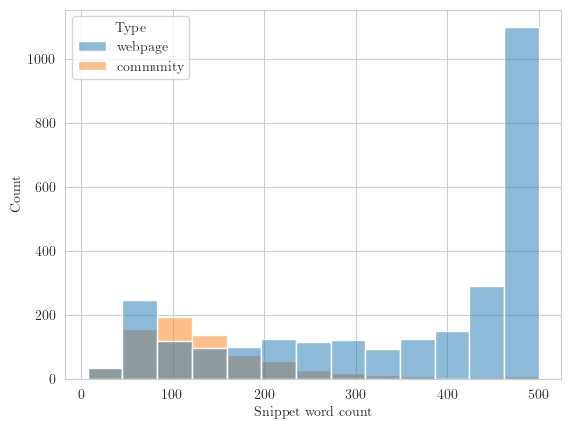

In [8]:
sns.histplot(data=swisscom_dataset_df, x="word_count", hue="Type")
plt.xlabel("Snippet word count")
plt.savefig("../figures/dataset_distribution.svg")